# Couette flow

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1=ib.stretching(35, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s1=np.r_[s1, 2*s1[-1]-s1[-2::-1]]
s1/=s1[-1]

s2=ib.stretching(43, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s2=np.r_[s2, 2*s2[-1]-s2[-2::-1]]
s2/=s2[-1]

solver = ib.Solver(x=s1, y=s2, periodic=True, iRe=1/1000, Co=0.75, fractionalStep=False)

In [4]:
(len(s2)-1)/3

28.0

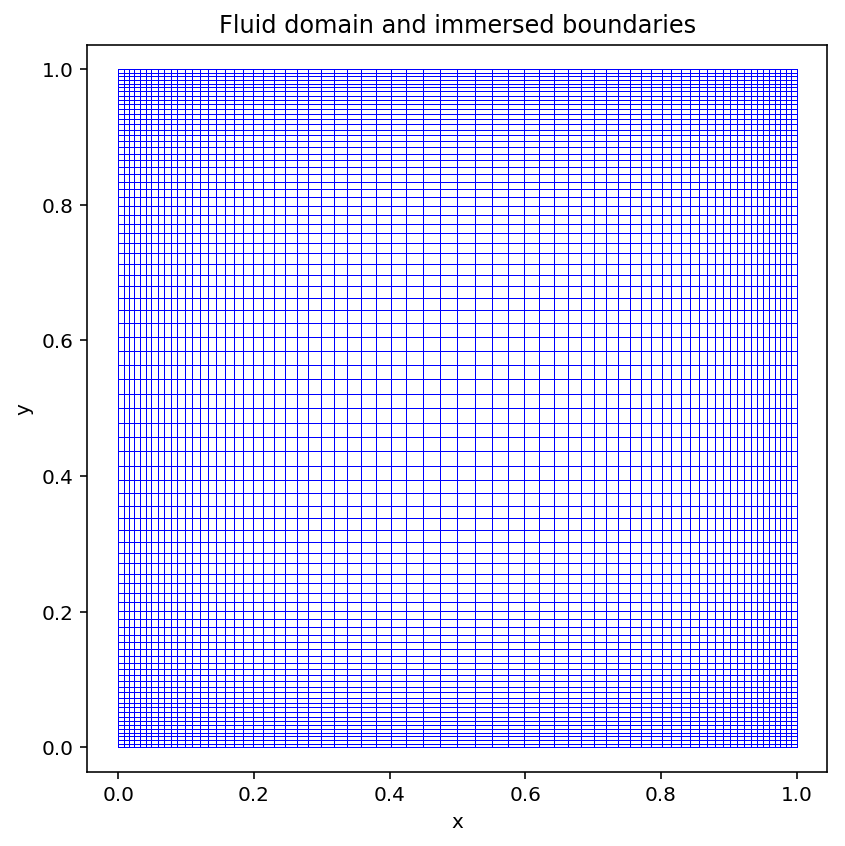

In [5]:
solver.plot_domain()

## Boundary conditions

In [6]:
x0 = solver.zero(); x0[:solver.fluid.u.size] = 1.0

In [7]:
uBC, vBC = solver.zero_boundary_conditions()
vBC[0][:] = 1

## Unsteady simulation

In [8]:
%%time
x, infodict = solver.steady_state(x0, uBC, vBC, outflowEast=False)

   k   residual_x   residual_f 
   1  2.08491e+00  2.14286e+00 
   2  1.11955e+00  3.30108e+00 
   3  8.43428e-14  3.84229e-14 
CPU times: user 13.3 s, sys: 662 ms, total: 14 s
Wall time: 748 ms


## Display results

Plot velocity components and pressure.

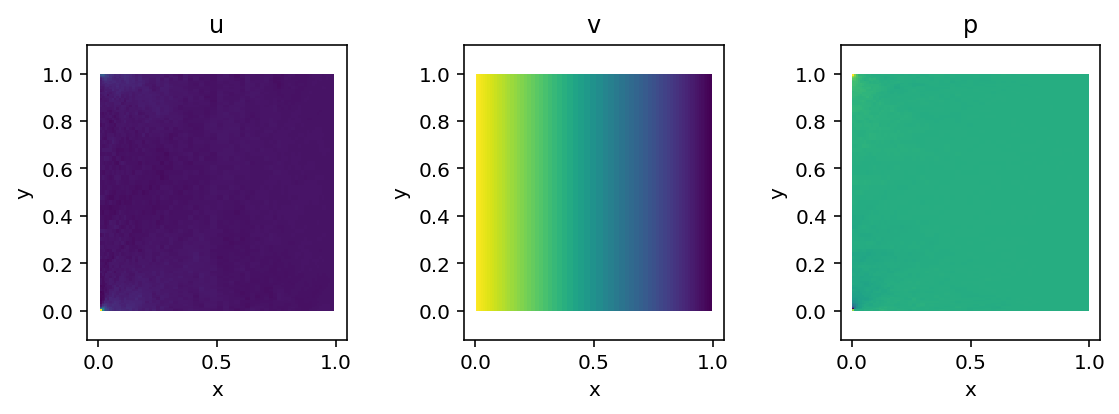

In [9]:
solver.plot_field(x, xlim=(0, 1), ylim=(0, 1))

Check results against analytical solution given by
$$\frac{v(x, t)}{V} =  1 - x$$

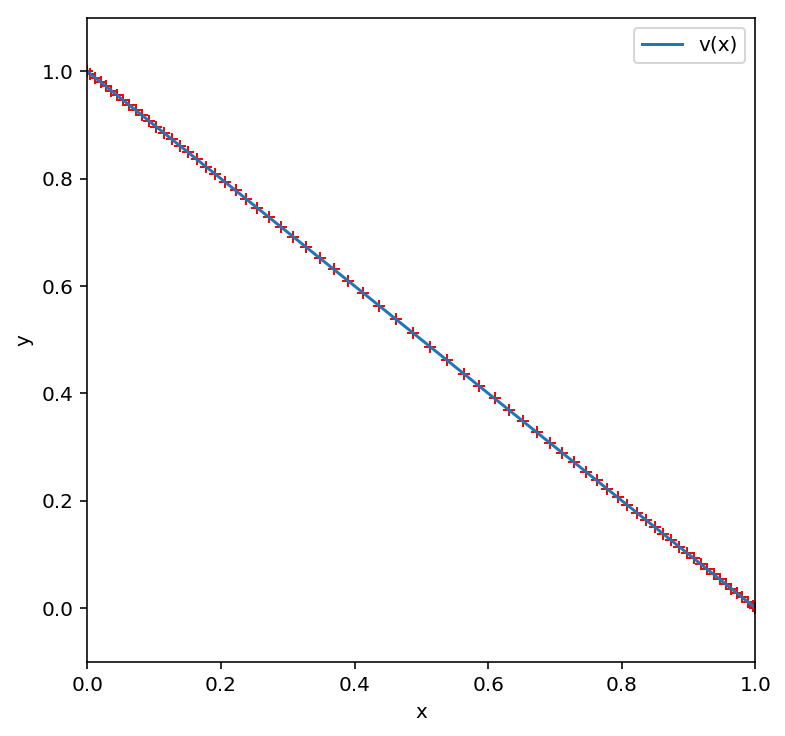

In [10]:
plt.figure(figsize=(5.5, 5.25))
vi = solver.fluid.v.shape[0]//2

vx = np.r_[solver.fluid.x[0], solver.fluid.v.x, solver.fluid.x[-1]]

u, v, p = solver.reshape(solver.unpack(x), p0=0)
vv = np.r_[vBC[0][vi], v[vi,:], vBC[1][vi]]
plt.plot(vx, vv, '+r');
plt.plot(vx, 1-vx, label='v(x)');


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.xlim(0, 1.0)
plt.ylim(-0.1, 1.1);

Show convergence history

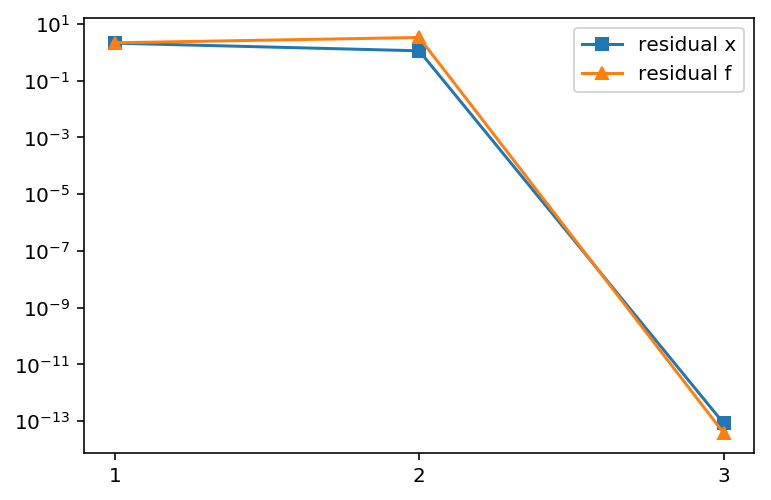

In [11]:
from matplotlib.ticker import MaxNLocator
k = np.arange(1, len(infodict['residual_x'])+1)
plt.semilogy(k, infodict['residual_x'], 's-', label='residual x')
plt.semilogy(k, infodict['residual_f'], '^-', label='residual f')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend();